In [1]:
import pandas as pd
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import re
import numpy as np
from collections import Counter
import operator
import seaborn as sns

In [2]:
def word_cloud(topic,sw):
    corpus = " ".join(k for k in topic)
    
    image = np.array(Image.open("./img/italy.png"))
    transformed_image = np.ndarray((image.shape[0],image.shape[1]), np.int32)
    transformed_image[transformed_image == 0] = 255


    wc = WordCloud(background_color="black", max_words=125, mask=transformed_image, stopwords=sw,
               contour_width=1, contour_color='white')
    wc.generate(corpus)

    plt.figure(figsize=[15,10])
    plt.title('Italy')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()


def remove_punctuation(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|\']', r'', sentence)
    cleaned = re.sub(r'[.|,|)(|\|/]', r' ', cleaned)
    cleaned = re.sub(r'[0-9]', r' ', cleaned)
    return cleaned

def pub(x):
    pat = 'http://'
    pat2 = 'https://'
    pat3 = 'www.'
    y = re.sub(pat, '', x)
    y = re.sub(pat2, '', y)
    y = re.sub(pat3, '', y)
    f = y.find('.', 3)
    return y[:f]

In [3]:
df = pd.read_csv('./news-dataset.csv')

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,url,publisher,publish_date,author,title,image,body_text,publish_data,reliability
0,https://www.conoscenzealconfine.it/oms-italia-...,https://www.conoscenzealconfine.it,NaN,['Conoscenze Al Confine'],OMS: “L’Italia è il banco di prova del Coronav...,https://www.conoscenzealconfine.it/wp-content/...,di Guido da Landriano\n\nL’Italia è forse la “...,NaN,0
1,https://www.ilprimatonazionale.it/politica/cor...,https://www.ilprimatonazionale.it,2020-03-05,[],"Coronavirus, crolla la fiducia in Conte. Ora è...",https://www.ilprimatonazionale.it/wp-content/u...,"Roma, 5 mar – Per mesi e mesi Giuseppe Conte è...",NaN,0
2,https://www.ilprimatonazionale.it/cronaca/coro...,https://www.ilprimatonazionale.it,2020-03-05,[],"Coronavirus, i media esteri all’attacco dell’I...",https://www.ilprimatonazionale.it/wp-content/u...,"Roma, 5 mar – Con l’aggravarsi dell’emergenza ...",NaN,0
3,https://www.ilprimatonazionale.it/cultura/coro...,https://www.ilprimatonazionale.it,2020-03-05,[],Il coronavirus un’arma da guerra biologica? Ip...,https://www.ilprimatonazionale.it/wp-content/u...,"Roma, 5 mar – La situazione sta, con tutta evi...",NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
df.shape

(2734, 9)

In [7]:
df = df.dropna(subset=['body_text'])

In [8]:
df_low = df[df.reliability == 0]
df_high = df[df.reliability == 1]

In [9]:
print(df_low.shape)
print(df_high.shape)

(447, 9)
(2192, 9)


In [10]:
sw1 = ["a","abbastanza","abbia","abbiamo","abbiano","abbiate","accidenti","ad","adesso","affinché","agl","agli","ahime","ahimè","ai","al","alcuna","alcuni","alcuno","all","alla","alle","allo","allora","altre","altri","altrimenti","altro","altrove","altrui","anche","ancora","anni","anno","ansa","anticipo","assai","attesa","attraverso","avanti","avemmo","avendo","avente","aver","avere","averlo","avesse","avessero","avessi","avessimo","aveste","avesti","avete","aveva","avevamo","avevano","avevate","avevi","avevo","avrai","avranno","avrebbe","avrebbero","avrei","avremmo","avremo","avreste","avresti","avrete","avrà","avrò","avuta","avute","avuti","avuto","basta","ben","bene","benissimo","brava","bravo","buono","c","caso","cento","certa","certe","certi","certo","che","chi","chicchessia","chiunque","ci","ciascuna","ciascuno","cima","cinque","cio","cioe","cioè","circa","citta","città","ciò","co","codesta","codesti","codesto","cogli","coi","col","colei","coll","coloro","colui","come","cominci","comprare","comunque","con","concernente","conclusione","consecutivi","consecutivo","consiglio","contro","cortesia","cos","cosa","cosi","così","cui","d","da","dagl","dagli","dai","dal","dall","dalla","dalle","dallo","dappertutto","davanti","degl","degli","dei","del","dell","della","delle","dello","dentro","detto","deve","devo","di","dice","dietro","dire","dirimpetto","diventa","diventare","diventato","dopo","doppio","dov","dove","dovra","dovrà","dovunque","due","dunque","durante","e","è","ebbe","ebbero","ebbi","ecc","ecco","ed","effettivamente","egli","ella","entrambi","eppure","era","erano","eravamo","eravate","eri","ero","esempio","esse","essendo","esser","essere","essi","ex","fa","faccia","facciamo","facciano","facciate","faccio","facemmo","facendo","facesse","facessero","facessi","facessimo","faceste","facesti","faceva","facevamo","facevano","facevate","facevi","facevo","fai","fanno","farai","faranno","fare","farebbe","farebbero","farei","faremmo","faremo","fareste","faresti","farete","farà","farò","fatto","favore","fece","fecero","feci","fin","finalmente","finche","fine","fino","forse","forza","fosse","fossero","fossi","fossimo","foste","fosti","fra","frattempo","fu","fui","fummo","fuori","furono","futuro","generale","gente","gia","giacche","giorni","giorno","giu","già","gli","gliela","gliele","glieli","glielo","gliene","grande","grazie","gruppo","ha","haha","hai","hanno","ho","i","ie","ieri","il","improvviso","in","inc","indietro","infatti","inoltre","insieme","intanto","intorno","invece","io","l","la","lasciato","lato","le","lei","li","lo","lontano","loro","lui","lungo","luogo","là","ma","macche","magari","maggior","mai","male","malgrado","malissimo","me","medesimo","mediante","meglio","meno","mentre","mesi","mezzo","mi","mia","mie","miei","mila","miliardi","milioni","minimi","mio","modo","molta","molti","moltissimo","molto","momento","mondo","ne","negl","negli","nei","nel","nell","nella","nelle","nello","nemmeno","neppure","nessun","nessuna","nessuno","niente","no","noi","nome","non","nondimeno","nonostante","nonsia","nostra","nostre","nostri","nostro","novanta","nove","nulla","nuovi","nuovo","o","od","oggi","ogni","ognuna","ognuno","oltre","oppure","ora","ore","osi","ossia","ottanta","otto","paese","parecchi","parecchie","parecchio","parte","partendo","peccato","peggio","per","perche","perchè","perché","percio","perciò","perfino","pero","persino","persone","però","piedi","pieno","piglia","piu","piuttosto","più","po","pochissimo","poco","poi","poiche","possa","possedere","posteriore","posto","potrebbe","preferibilmente","presa","press","prima","primo","principalmente","probabilmente","promesso","proprio","puo","pure","purtroppo","può","qua","qualche","qualcosa","qualcuna","qualcuno","quale","quali","qualunque","quando","quanta","quante","quanti","quanto","quantunque","quarto","quasi","quattro","quel","quella","quelle","quelli","quello","quest","questa","queste","questi","questo","qui","quindi","quinto","realmente","recente","recentemente","registrazione","relativo","riecco","rispetto","salvo","sara","sarai","saranno","sarebbe","sarebbero","sarei","saremmo","saremo","sareste","saresti","sarete","sarà","sarò","scola","scopo","scorso","se","secondo","seguente","seguito","sei","sembra","sembrare","sembrato","sembrava","sembri","sempre","senza","sette","si","sia","siamo","siano","siate","siete","sig","solito","solo","soltanto","sono","sopra","soprattutto","sotto","spesso","sta","stai","stando","stanno","starai","staranno","starebbe","starebbero","starei","staremmo","staremo","stareste","staresti","starete","starà","starò","stata","state","stati","stato","stava","stavamo","stavano","stavate","stavi","stavo","stemmo","stessa","stesse","stessero","stessi","stessimo","stesso","steste","stesti","stette","stettero","stetti","stia","stiamo","stiano","stiate","sto","su","sua","subito","successivamente","successivo","sue","sugl","sugli","sui","sul","sull","sulla","sulle","sullo","suo","suoi","tale","tali","talvolta","tanto","te","tempo","terzo","th","ti","titolo","tra","tranne","tre","trenta","triplo","troppo","trovato","tu","tua","tue","tuo","tuoi","tutta","tuttavia","tutte","tutti","tutto","uguali","ulteriore","ultimo","un","una","uno","uomo","va","vai","vale","vari","varia","varie","vario","verso","vi","vicino","visto","vita","voi","volta","volte","vostra","vostre","vostri","vostro"]
sw2 = ['—', 'c\'è', '3', 'che,','–', '-', 'the', 'via', 'totale', 'settimane', 'spiega', 'situazione', 'non', 'il', 'la', 'non', 'san', 'settimana', 'la', 'il', 'dell', '--', '-' ,'–', '%', 'almeno','far', 'new','bisogno', ':', 'dell']

sw = sw1+sw2

In [11]:
newss = []
word_freq = Counter()

for news in df.body_text:
    news = news.lower()
    news = remove_punctuation(news)
    newss.append(news)
    newsWords = news.split()
    word_freq.update(newsWords)


for wordsToRemove in sw:
    word_freq.pop(wordsToRemove, None)      

top_500_words_map = sorted(word_freq.items(), key=operator.itemgetter(1), reverse=True)[:500]

topic = [x[0] for x in top_500_words_map]

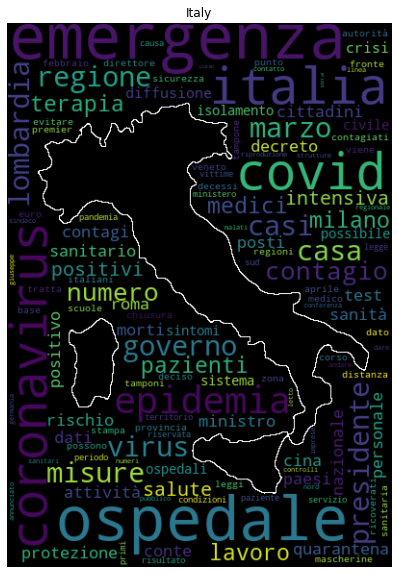

In [12]:
word_cloud(topic,sw)

Text(0, 0.5, 'Count')

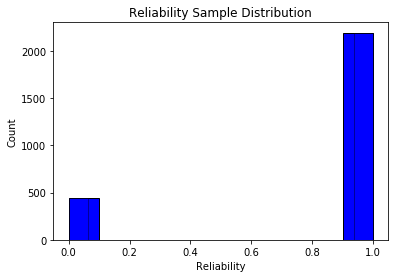

In [11]:
plt.hist(df['reliability'], color = 'blue', edgecolor = 'black')


sns.distplot(df['reliability'], hist=True, kde=False, 
             bins=16, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Reliability Sample Distribution')
plt.xlabel('Reliability')
plt.ylabel('Count')

In [12]:
df_high['publisher2'] = df_high['publisher'].apply(pub)
df_low['publisher2'] = df_low['publisher'].apply(pub)

/Users/pieroromare/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pieroromare/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


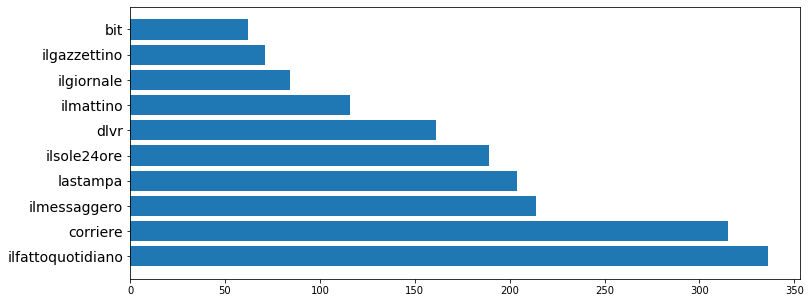

In [13]:
dict_media = Counter(df_high['publisher2'])
dict_media = dict(dict_media.most_common(10))

labels, values = zip(*dict_media.items())
indexes = np.arange(len(labels))

plt.figure(figsize =(12, 5))
plt.yticks(fontsize=14)
plt.barh(labels, values)
plt.show()

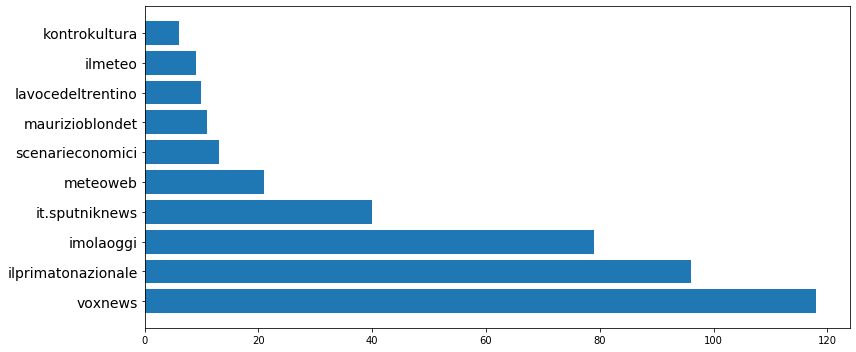

In [14]:
dict_media = Counter(df_low['publisher2'])
dict_media = dict(dict_media.most_common(10))

labels, values = zip(*dict_media.items())
indexes = np.arange(len(labels))

plt.figure(figsize =(12, 5))
plt.yticks(fontsize=14)
plt.barh(labels, values)
plt.tight_layout()
plt.show()

In [15]:
txt = df['body_text'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))

In [16]:
word_list = [word for line in txt for word in line.split()]

In [17]:
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(50)
counts_df = pd.DataFrame(counts)

In [18]:
counts_df.columns = ['word', 'frequency']

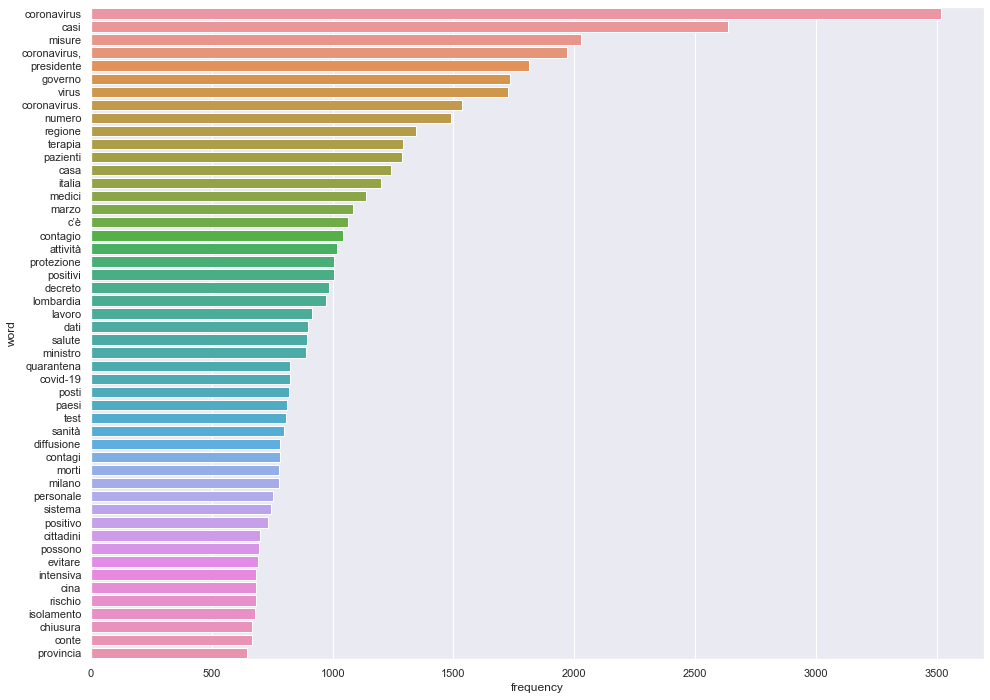

In [19]:
fig, ax = plt.subplots(figsize = (16, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')

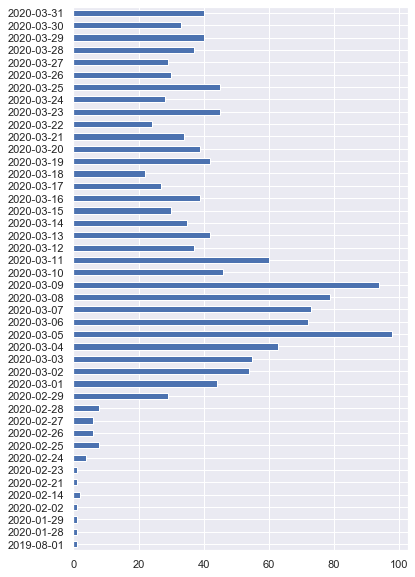

In [20]:
plt.figure(figsize=(6, 10))
a = df.publish_date.value_counts().sort_index()[:-7]
a.plot(kind = 'barh')